# Importem les llibreries que ens faran falta per entrenar la Xarxa Neuronal

In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras.preprocessing import image
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
import cv2
import glob
from skimage import io

Using TensorFlow backend.


# Carreguem els datasets d'imatges


In [3]:
cotxes = glob.glob('train/cars/*')
print(f'There are {len(cotxes)} images of cars.')

motos = glob.glob('train/motorcycle/*')
print(f'There are {len(motos)} images of motos.')

trucks = glob.glob('train/trucks/*')
print(f'There are {len(trucks)} images of trucks.')

There are 10000 images of cars.
There are 10182 images of motos.
There are 10120 images of trucks.


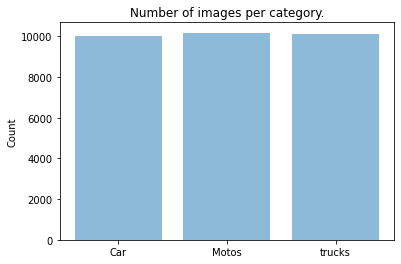

In [4]:
categories = ['Car', 'Motos','trucks']
y_pos = np.arange(len(categories))
count_per_category = [len(cotxes), len(motos), len(trucks)]
 
plt.bar(y_pos, count_per_category, align='center', alpha=0.5)
plt.xticks(y_pos, categories)
plt.ylabel('Count')
plt.title('Number of images per category.')
 
plt.show()

In [5]:
def plot_random_sample(images_path, sample_size, title):
    figure = plt.figure(figsize=(25, 25))
    sample = np.random.choice(images_path, sample_size)
    for sample_index, image_path in enumerate(sample):
        ax = figure.add_subplot(1, sample_size, sample_index + 1, xticks=[], yticks=[])
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax.imshow(image)
        ax.set_title(title)

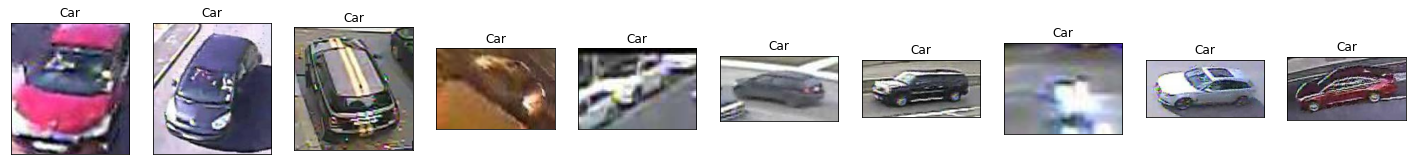

In [6]:
plot_random_sample(cotxes, 10, 'Car')

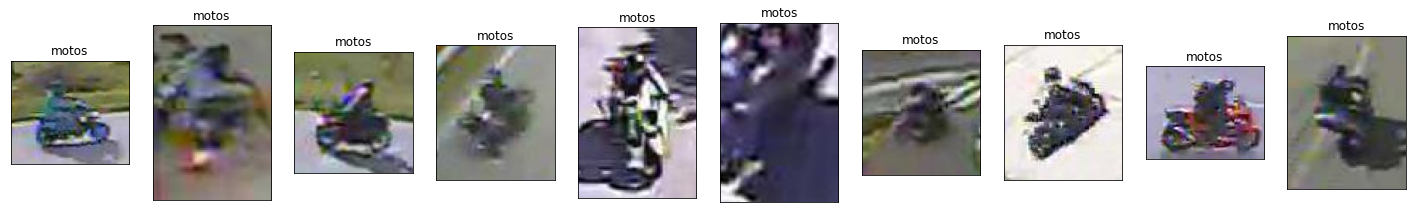

In [7]:
plot_random_sample(motos, 10, 'motos')

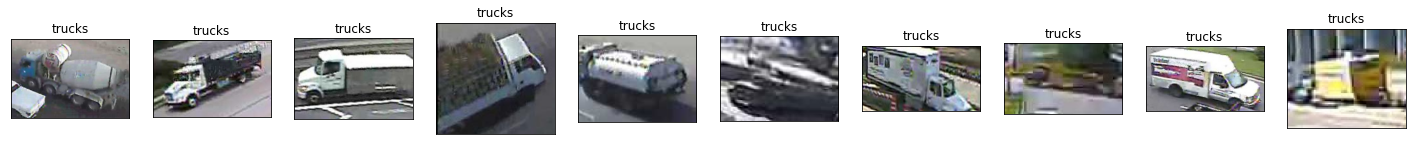

In [8]:
plot_random_sample(trucks, 10, 'trucks')

# Dividim les imatges per classes i les llegim

El que fem a continuació és agafar un 10% de les dades i les possem a la carpeta ***validation***, les quals ens serviran per validar el model programat, mentre que el 90% restant l'utilitzarem a l'entrenament del model. Agafem 10000 imatges de cada classe.

In [11]:
from sklearn.utils import shuffle

def load_image(image_path):
    image = cv2.imread(image_path)
    img_to_yuv = cv2.cvtColor(image,cv2.COLOR_BGR2YUV)
    img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
    image = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)
    
    return image

VALIDATION_PROPORTION = 0.1
cotxes = shuffle(glob.glob('train/cars/*'))
cotxes = cotxes[:10000]
split_point = int(len(cotxes) * VALIDATION_PROPORTION)
for i, image_path in enumerate(cotxes):
    image = load_image(image_path)
    if i < split_point:
        cv2.imwrite("/home/ferranvf/Escriptori/Uni/2n curs/2n semestre/processament senyal, imatge i video/projecte/DeepLearning/dataset/valid/cars/imatge%d.png" % i,image)
    else:
        cv2.imwrite("/home/ferranvf/Escriptori/Uni/2n curs/2n semestre/processament senyal, imatge i video/projecte/DeepLearning/dataset/train/cars/imatge%d.png" % i,image)
    
motos = shuffle(glob.glob('train/motorcycle/*'))
motos = motos[:10000]
split_point = int(len(motos) * VALIDATION_PROPORTION)
for i, image_path in enumerate(motos):
    try:
        image = load_image(image_path)
        if i < split_point:
            cv2.imwrite("/home/ferranvf/Escriptori/Uni/2n curs/2n semestre/processament senyal, imatge i video/projecte/DeepLearning/dataset/valid/motos/imatge%d.png" % i,image)
        else:
            cv2.imwrite("/home/ferranvf/Escriptori/Uni/2n curs/2n semestre/processament senyal, imatge i video/projecte/DeepLearning/dataset/train/motos/imatge%d.png" % i,image)
    except:
        print(image_path)
camio = shuffle(glob.glob('train/trucks/*'))
camions = camio[:10000]
split_point = int(len(camions) * VALIDATION_PROPORTION)
for i, image_path in enumerate(camions):
    image = load_image(image_path)
    if i < split_point:
        cv2.imwrite("/home/ferranvf/Escriptori/Uni/2n curs/2n semestre/processament senyal, imatge i video/projecte/DeepLearning/dataset/valid/trucks/imatge%d.png" % i,image)
    else:
        cv2.imwrite("/home/ferranvf/Escriptori/Uni/2n curs/2n semestre/processament senyal, imatge i video/projecte/DeepLearning/dataset/train/trucks/imatge%d.png" % i,image)



In [10]:
dirname = os.path.join(os.getcwd(), 'dataset/train')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("Llegint imatges de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        try:
            if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename): #ens assegurem que només tinguem imatges.
                cant=cant+1
                filepath = os.path.join(root, filename)
                image = cv2.imread(filepath)
                image = cv2.resize(image, dsize=(64,64)) #fem totes les imatges de la mateixa mida
                images.append(image)
                if prevRoot !=root:
                    prevRoot=root
                    directories.append(root)
                    dircount.append(cant)
                    cant=0
        except:
            print("ERROR: ", filename)
    print(root, cant)
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directoris llegits:',len(directories))
print("Imatges a cada directori", dircount)
print("Suma total d'imatges en subdirectoris:",sum(dircount))

Llegint imatges de  /home/ferranvf/Escriptori/Uni/2n curs/2n semestre/processament senyal, imatge i video/projecte/DeepLearning/dataset/train/
/home/ferranvf/Escriptori/Uni/2n curs/2n semestre/processament senyal, imatge i video/projecte/DeepLearning/dataset/train/ 0
/home/ferranvf/Escriptori/Uni/2n curs/2n semestre/processament senyal, imatge i video/projecte/DeepLearning/dataset/train/motos 8999
/home/ferranvf/Escriptori/Uni/2n curs/2n semestre/processament senyal, imatge i video/projecte/DeepLearning/dataset/train/trucks 8999
/home/ferranvf/Escriptori/Uni/2n curs/2n semestre/processament senyal, imatge i video/projecte/DeepLearning/dataset/train/cars 8999
Directoris llegits: 3
Imatges a cada directori [9001, 9000, 8999]
Suma total d'imatges en subdirectoris: 27000


# Creem les etiquetes que caracteritzen cada objecte

In [10]:
labels=[]
index=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(index)
    index=index+1
print("Quantitat d'etiquetas creadas: ",len(labels))

Quantitat d'etiquetas creadas:  27000


In [11]:
vehicles=[]
index=0
for directori in directories:
    name = directori.split(os.sep)
    print(index , name[len(name)-1])
    vehicles.append(name[len(name)-1])
    index=index+1

0 motos
1 trucks
2 cars


In [12]:
#convertim les llistes a numpy
y = np.array(labels) 
X = np.array(images) 

# Trobem el nombre unic del train de labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  3
Output classes :  [0 1 2]


# Creem els conjunts d'entrenament i test

In [13]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (21600, 64, 64, 3) (21600,)
Testing data shape :  (5400, 64, 64, 3) (5400,)


# Preprocessem les imatges 

In [14]:
test_X = test_X.astype('float32')
train_X = train_X.astype('float32')
train_X = train_X / 255. #normalitzem les dades.
test_X = test_X / 255.

# Fem el One-hot encodeing de la xarxa
Per a variables categòriques on no hi ha cap relació ordinal, no és sufient la codificació entera, ja que permet al model assumir una ordenació natural entre categories que pot produir un mal rendiment o resultats inesperats.
Una solució és la codificació one-hot la qual elimina la variable codiciada d'enters i s'afegeix una nova variable binària per cada valor únic.

In [15]:
# Canvia les labels de categorical a one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)


print('Label original:', train_Y[0])
print('Lable després de la converisió a one-hot:', train_Y_one_hot[0])

Label original: 0
Lable després de la converisió a one-hot: [1. 0. 0.]


# Creem el Set d'entrenament i validació

In [16]:
#Barrejar tot i crear els grups de training i testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [17]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape) #ens assegurem que tots tenen la mateixa mesura

(17280, 64, 64, 3) (4320, 64, 64, 3) (17280, 3) (4320, 3)


# Creem el model CNN

In [23]:
#declarem les variables amb els paràmetress de configuració de la xarxa
epochs = 6 # Quantitat d'iteraciones completes al conjunt d'imagenes de training
batch_size = 64 # Quantitat d'imatges que s'agafen a la vegada en memòria

**Hem utilitzat Sequential() ja que es un model adequat per una pila plana de capes on cada capa té exactament un tensor d'entrada i un tensor de sortida.**

**Conv2D és una capa la qual crea un nucli de convolució que es converteix amb l'entrada de capa per produir un tensor de sortides. Utilitzem també un MaxPooling2D el qual redactiva els exemples de la representació d'entrada prenent el valor màxim sobre la finestra, en aquest cas de 2x2 a cada dimensió al llarg del eix de les característiques. El Dropout ens ajuda a no produir overfitting. El Flatten() el que fa es transformar un tensor multidemensional en un tensor 1D. Dense() és una capa de la xarxa neuranal profundament connectada.**

In [24]:
vehicles_model = Sequential() 
vehicles_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(64,64,3)))
vehicles_model.add(MaxPooling2D((2, 2),padding='same'))
vehicles_model.add(Dropout(0.25))

vehicles_model.add(Conv2D (64, kernel_size =(3,3), activation = 'relu'))
vehicles_model.add(MaxPooling2D((2, 2),padding='same'))
vehicles_model.add(Dropout(0.25))

vehicles_model.add(Conv2D (128, kernel_size =(3,3), activation = 'relu'))
vehicles_model.add(MaxPooling2D((2, 2),padding='same'))
vehicles_model.add(Dropout(0.25))

vehicles_model.add(Conv2D (256, kernel_size =(3,3), activation = 'relu'))
vehicles_model.add(MaxPooling2D((2, 2),padding='same'))
vehicles_model.add(Dropout(0.4))

vehicles_model.add(Conv2D (512, kernel_size =(3,3), activation = 'relu'))
vehicles_model.add(MaxPooling2D((2, 2),padding='same'))
vehicles_model.add(Dropout(0.4))


vehicles_model.add(Flatten())
vehicles_model.add(Dense(512, activation='relu'))
vehicles_model.add(Dropout(0.5))
vehicles_model.add(Dense(nClasses, activation='softmax'))

In [25]:
vehicles_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 128)      

In [26]:
vehicles_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

# Entrenem el model: Aprendre a classificar imatges

In [27]:
vehicles_train = vehicles_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 17280 samples, validate on 4320 samples
Epoch 1/6
17280/17280 [==============================] - 144s 8ms/step - loss: 0.8839 - accuracy: 0.5620 - val_loss: 0.7158 - val_accuracy: 0.6731
Epoch 2/6
17280/17280 [==============================] - 163s 9ms/step - loss: 0.5928 - accuracy: 0.7519 - val_loss: 0.5077 - val_accuracy: 0.7894
Epoch 3/6
17280/17280 [==============================] - 162s 9ms/step - loss: 0.4841 - accuracy: 0.8043 - val_loss: 0.4512 - val_accuracy: 0.8176
Epoch 4/6
17280/17280 [==============================] - 153s 9ms/step - loss: 0.3980 - accuracy: 0.8409 - val_loss: 0.3631 - val_accuracy: 0.8576
Epoch 5/6
17280/17280 [==============================] - 168s 10ms/step - loss: 0.3617 - accuracy: 0.8589 - val_loss: 0.3263 - val_accuracy: 0.8678
Epoch 6/6
17280/17280 [==============================] - 172s 10ms/step - loss: 0.3272 - accuracy: 0.8719 - val_loss: 0.3345 - val_accuracy: 0.8687


# Avaluem la xarxa 

In [28]:
test_eval = vehicles_model.evaluate(test_X, test_Y_one_hot, verbose=1)

5400/5400 [==============================] - 7s 1ms/step


In [29]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.34103816147203797
Test accuracy: 0.8666666746139526


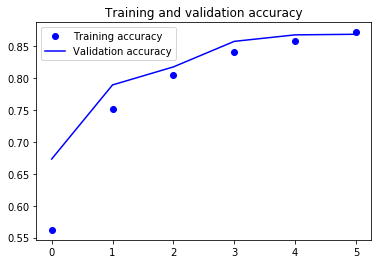

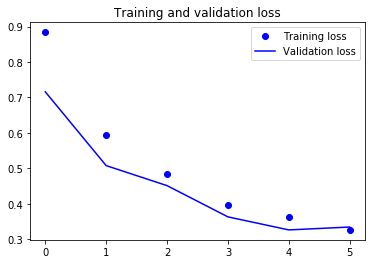

In [30]:
accuracy = vehicles_train.history['accuracy']
val_accuracy = vehicles_train.history['val_accuracy']
loss = vehicles_train.history['loss']
val_loss = vehicles_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [31]:
predicted_classes2 = vehicles_model.predict(test_X)

In [32]:
predicted_classes=[]
for predicted_vehicles in predicted_classes2:
    predicted_classes.append(predicted_vehicles.tolist().index(max(predicted_vehicles)))
predicted_classes=np.array(predicted_classes)

In [33]:
predicted_classes.shape, test_Y.shape

((5400,), (5400,))

# Mirem els errors per millorar-los

Mirem on la xarxa ha fallat per proposar nous canvis a l'hora d'entrenar-la.

Found 4680 correct labels


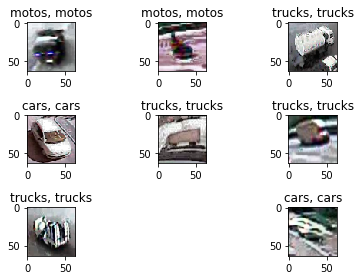

In [34]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(64,64,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(vehicles[predicted_classes[correct]],vehicles[test_Y[correct]]))
    plt.tight_layout()

Found 720 incorrect labels


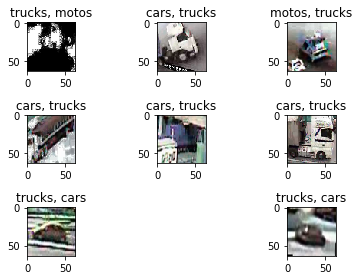

In [35]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(64,64,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(vehicles[predicted_classes[incorrect]],vehicles[test_Y[incorrect]]))
    plt.tight_layout()

In [36]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.84      0.96      0.90      1805
     Class 1       0.85      0.86      0.86      1729
     Class 2       0.91      0.78      0.84      1866

    accuracy                           0.87      5400
   macro avg       0.87      0.87      0.87      5400
weighted avg       0.87      0.87      0.87      5400



**precision** és la fracció d’instàncies rellevants entre les instàncies recuperades, mentre que el **recall** és la fracció de la quantitat total d’instàncies rellevants que realment es van recuperar.

La **f1-score** ens proporciona la mitjana entre la precision i el recall. 
El **suport** és el nombre de mostres de la resposta real que hi ha en aquesta classe.

In [37]:
from sklearn.externals import joblib
joblib.dump(vehicles_model, 'classificacio.pkl')
joblib.dump(vehicles,'llista.pkl')

/home/ferranvf/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['llista.pkl']